# Giovanni Minimum and Maximum 

## This feature would allow for our users to answer questions such as:

### What was the maximum rainfall from GPM/IMERG for The 2025 Texas Flood? Or what was the minimum temperature over an area?

Users should be able to add to their plots the __min/max value__ and __location__ (lat and lon). 

***
### This notebook was written Python 3.12.9 and requires the following python packages and their dependencies installed.

__Required:__
- numpy
- xarray

___Used for Plotting:___
- matplotlib
- cmaps (NCL colormaps)
- cartopy (for plotting maps, not necessary)

#### Data Used in Example From Giovanni

In this example we use data from GPM/IMERG Late [(GPM_3IMERGHHL_07)](https://giovanni.gsfc.nasa.gov/giovanni/#service=AcMp&starttime=2025-07-03T00:00:00Z&endtime=2025-07-05T23:59:59Z&shape=tl_2014_us_state/shp_25&&data=GPM_3IMERGHHL_07_precipitation(units%3Dinch%2Fhr)&dataKeyword=GPM_3IMERGHHL_07) for the 2025 Texas Flood Event.

***

In [3]:
# Importing Packages

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmaps #NCL Colormaps
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#### Opening the Data and Locating the Maximum Rainfall

In [4]:
# Min and Maximum Point Extraction

#Opening Dataset Downloaded from Giovanni
TX_prcp = xr.open_dataset("C:/Users/bomitch1/Downloads/Giovanni_Stats_Examples/1/g4.accumulate.GPM_3IMERGHHL_07_precipitation.20250703-20250705.180W_90S_180E_90N.nc")

#Example of the precipitation variable we will use (this is the step we have right now in Giovanni)
prcp = TX_prcp['GPM_3IMERGHHL_07_precipitation']

#Locate the indices of the location of the maximum value grid cell
lat_ind, lon_ind =  prcp.argmax(dim=['lat', 'lon']).values()

##### Use the indices to subset that the dataset to only the grid point.

In [5]:
#Subset the grid cell containing the Max Point
max_point = prcp[lat_ind,lon_ind]
max_point

<xarray.DataArray 'GPM_3IMERGHHL_07_precipitation' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    lat      float32 4B 30.45
    lon      float32 4B -98.15
Attributes:
    CodeMissingValue:    -9999.9
    DimensionNames:      time,lon,lat
    LongName:            \nComplete merged microwave-infrared (gauge-adjusted...
    fullnamepath:        /Grid/precipitation
    long_name:           Multi-satellite precipitation estimate with climatol...
    origname:            precipitation
    product_short_name:  GPM_3IMERGHHL
    product_version:     07
    quantity_type:       Precipitation
    standard_name:       precipitation
    units:               inch

##### Extract the maximum precipitation and it's latitude and longitude coordinates.

In [6]:
#Extract Max, Lat, and Lon as values
max_val, max_lat, max_lon = max_point.values, max_point.lat.values, max_point.lon.values

##### Plotting the Texas Flood Event on a Map

Text(0.01, 0.95, 'Max: 6.95 (30.45, -98.15)')

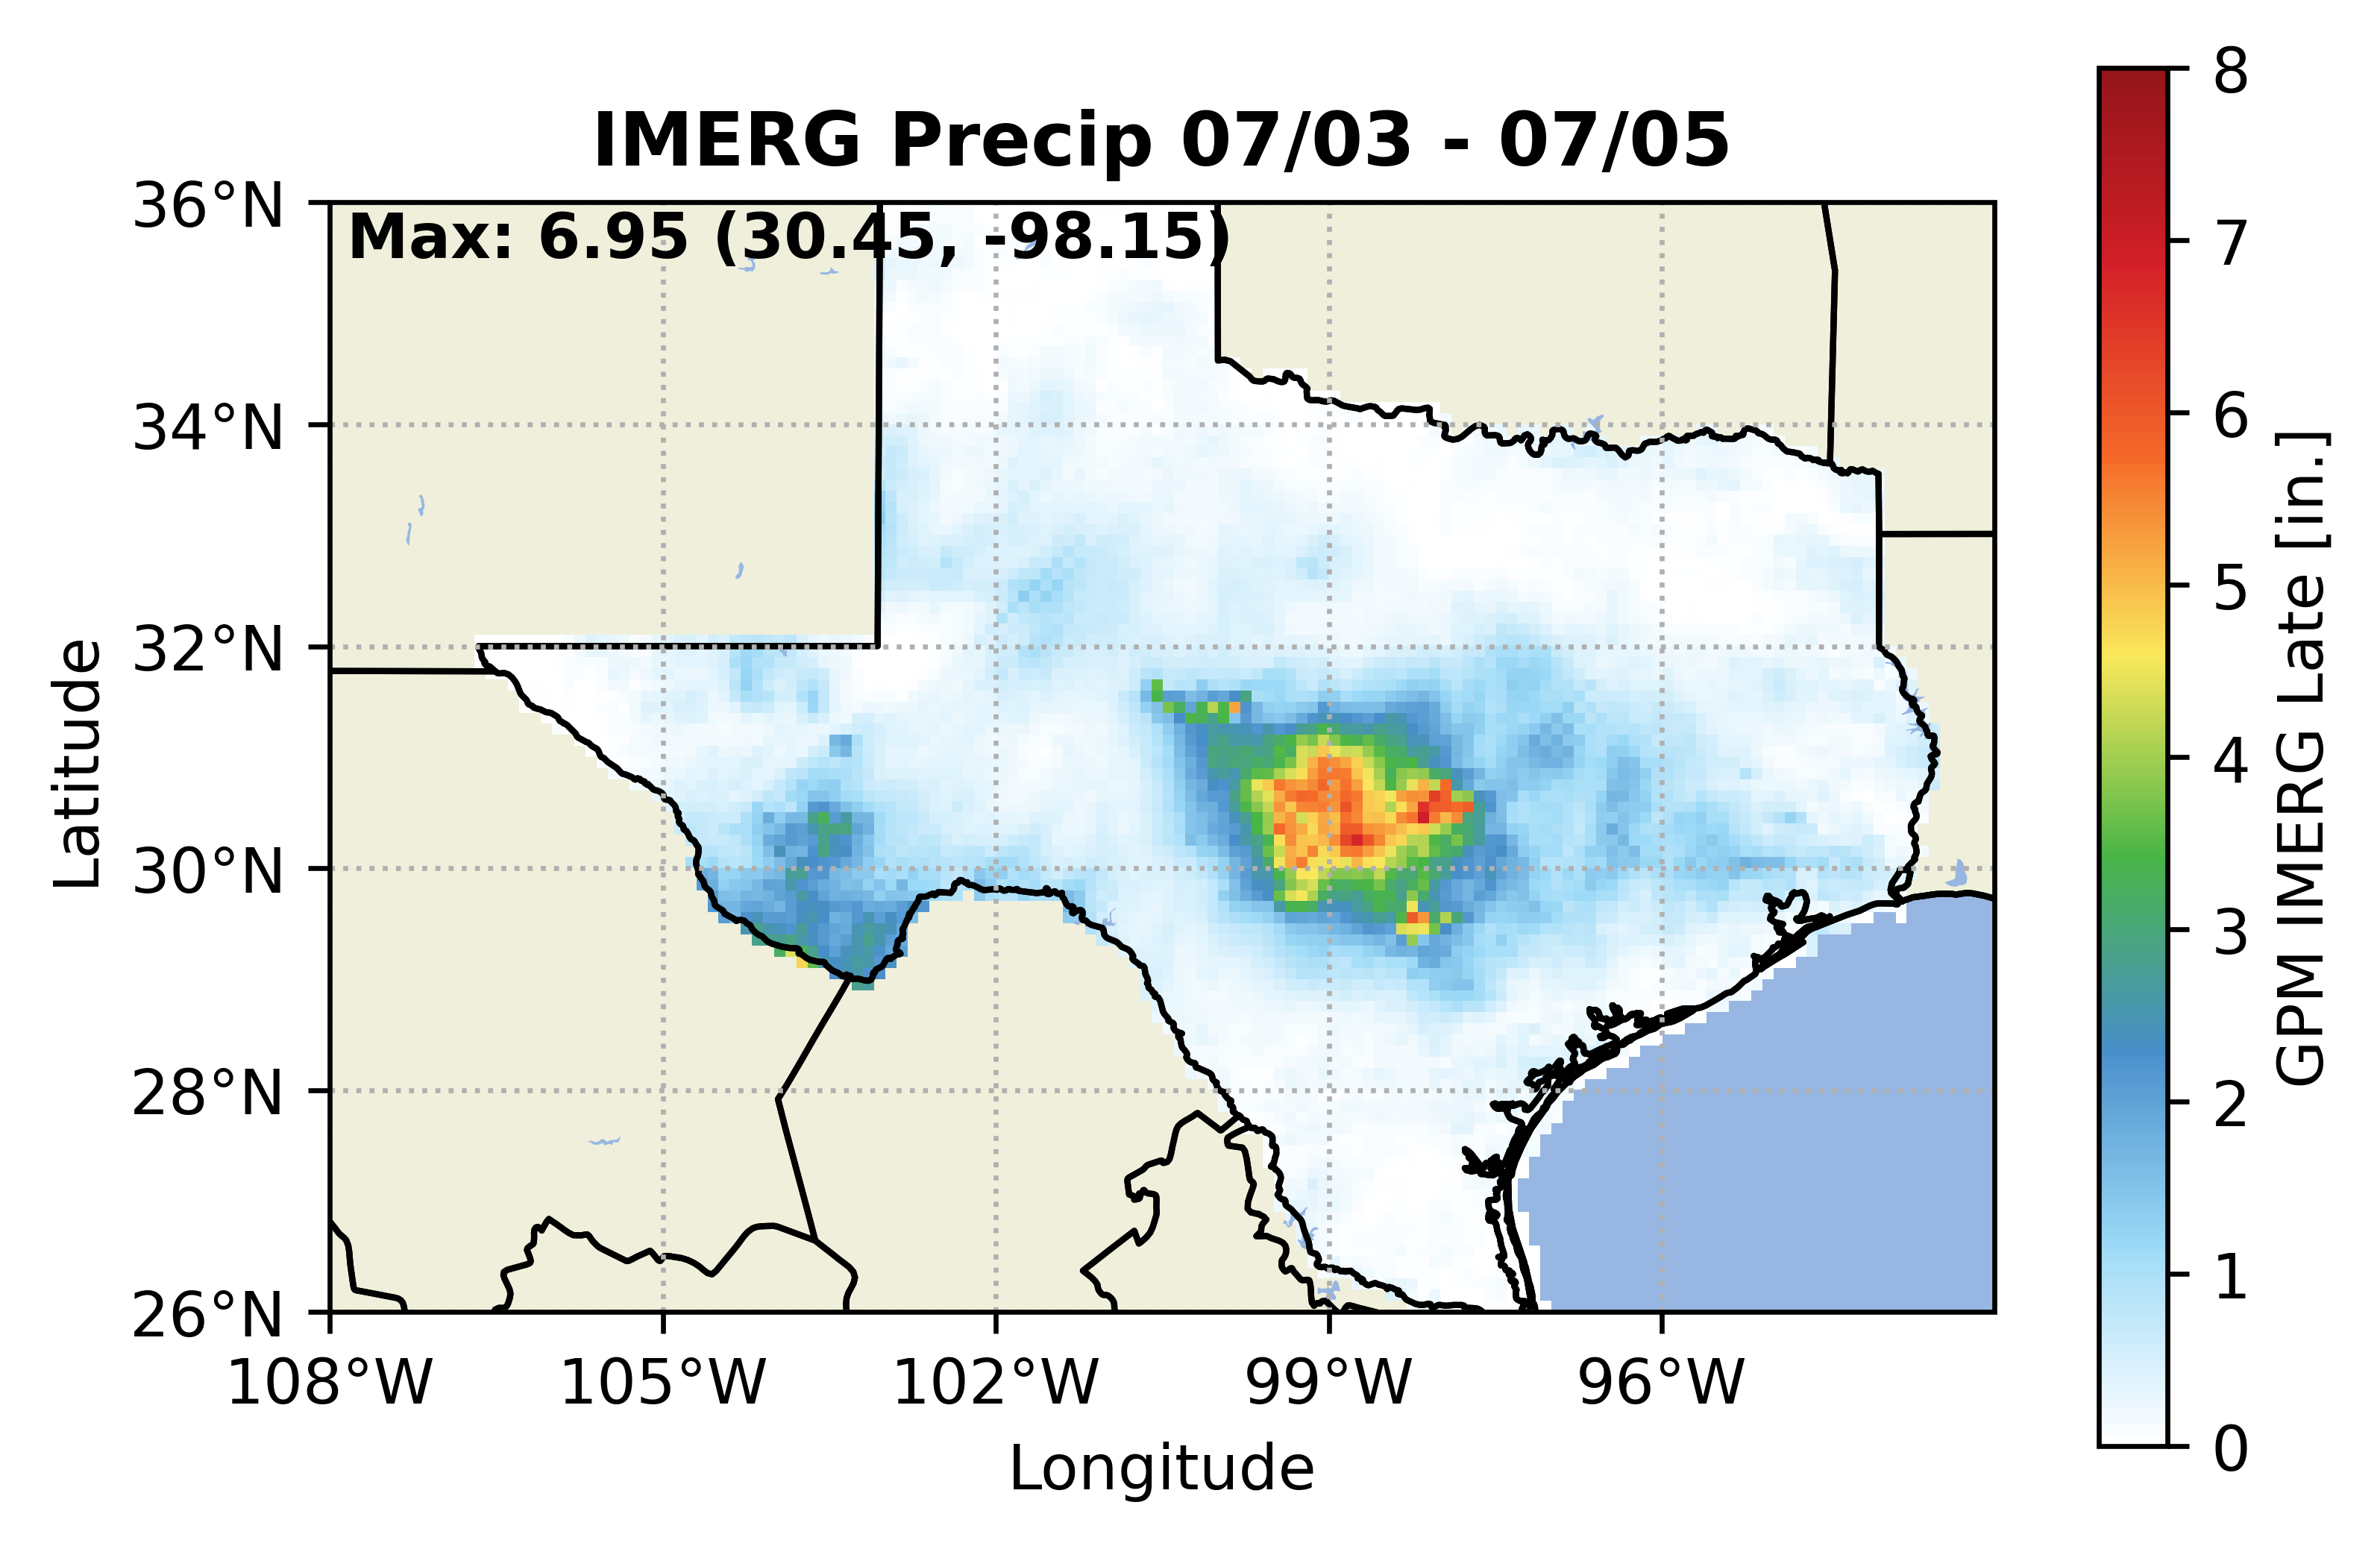

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4),subplot_kw={"projection": ccrs.PlateCarree()},
                          dpi=600)
ax1 = plt.subplot(1,1,1)

ax1.set_extent([-108, -93, 26, 36])

#Add Map Features
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.LAKES)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.STATES, edgecolor='black')

#Format X and Y Ticks 
ax1.set_yticks(np.arange(26,37,2), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(-108,-93,3), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

#Add Gridlines
ax1.grid(linestyle='dotted')

#Plot the grid cell values on the map. 
#Set the minimum and maximum for the colorbar. 
#Set the default colorbar to False (we will add later)
grid = prcp.plot.imshow(ax=ax1,cmap=cmaps.WhiteBlueGreenYellowRed,add_colorbar=False,
                                                             vmin=0,vmax=8)

#Add Colorbar referencing our grid, adding a label and setting the vertical orientation
cb = plt.colorbar(grid, ax=ax1, orientation = 'vertical', label='GPM IMERG Late [in.]')

#Add the Plot Title and X and Y axis labels along with font sizes
ax1.set_title('IMERG Precip 07/03 - 07/05', size=12, fontweight='bold')
ax1.set_xlabel("Longitude",  size=10)
ax1.set_ylabel("Latitude", size=10)
ax1.tick_params(axis='x', labelsize=10)  
ax1.tick_params(axis='y', labelsize=10) 

#Plotting the text Maximum Precpitation on the Map. 
axes_point = (0.01, 0.95)
ax1.text(axes_point[0],axes_point[1], f'Max: {max_val:.2f} ({max_lat:.2f}, {max_lon:.2f})', 
         transform=ax1.transAxes, size=10, weight='bold')